In [207]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sb
import time
from datetime import datetime, date

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
%matplotlib inline

# We heve 3 datasets ..

# 1- listings data

In [208]:
listings_data = pd.read_csv("listings.csv")
listings_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [209]:
#listings_data.info()
#listings_data.describe()
#listings_data.describe(include = 'object')
#listings_data.nunique() # id is unique url is unique

# 2- calendar  data

In [210]:
calendar_data = pd.read_csv("calendar.csv")
calendar_data.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


# 3- reviewsa data

In [211]:
reviews_data = pd.read_csv("reviews.csv")
reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


# First we need to prepare the data

by filling Nan values and one-hot encoding

In [212]:
# columns does not have null values
set(listings_data.columns[listings_data.isnull().mean() == 0])

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_name',
 'host_picture_url',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

In [213]:
# number of cols that does not have null values
np.sum(np.sum(listings_data.isnull()) / listings_data.shape[0]==0)

51

In [214]:
# Columns with 50% missing values:
set(listings_data.columns[listings_data.isnull().mean()>0.50])

{'has_availability',
 'jurisdiction_names',
 'license',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'notes',
 'security_deposit',
 'square_feet',
 'weekly_price'}

In [215]:
listings_data.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                  32
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                       15
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Gym,"Elevator in Building","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}    14
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heati

Text(0.5, 0, 'Neighbour cities')

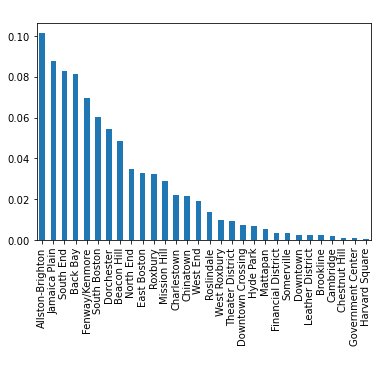

In [216]:
# Explore neighbourhood cities:

boston =listings_data.neighbourhood.value_counts()

(boston/listings_data.shape[0]).plot(kind='bar')

plt.title('Neighbour cities in Boston Airbnb',color='white')
plt.xlabel('Neighbour cities',color='white')





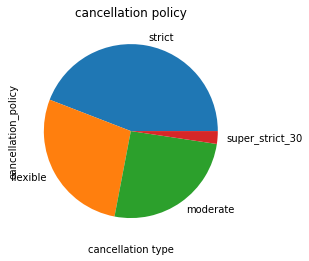

In [217]:
# Explore cancellation policy in airbnb:
cancel = listings_data.cancellation_policy.value_counts()
(cancel/listings_data.shape[0]).plot(kind='pie')
plt.title('cancellation policy')
plt.xlabel('cancellation type')
plt.show()

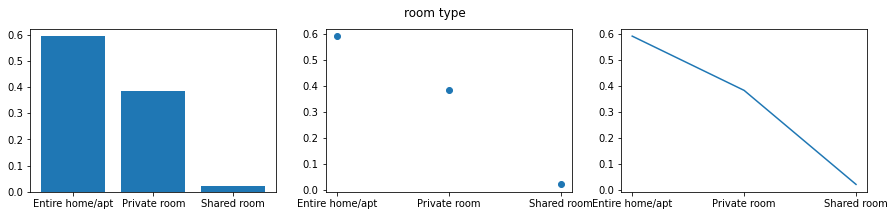

In [218]:
# Explore room type in Boston airbnb:

RT=listings_data.room_type.value_counts()
values = (RT/listings_data.shape[0])
names = ['Entire home/apt','Private room','Shared room']
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.bar(names,values)
plt.subplot(132)
plt.scatter(names,values)
plt.subplot(133)
plt.plot(names,values)
plt.suptitle('room type')
plt.show()

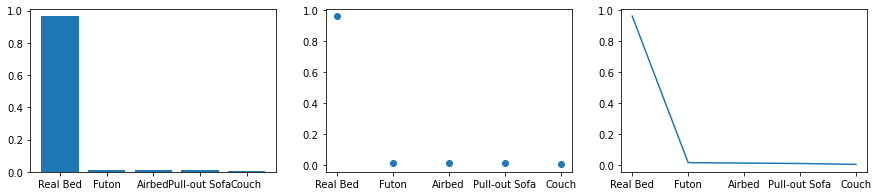

In [219]:
# Explore bed type in Boston airbnb:
BT=listings_data.bed_type.value_counts()
value = (BT/listings_data.shape[0])
name = ['Real Bed','Futon','Airbed','Pull-out Sofa','Couch']
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.bar(name,value)
plt.subplot(132)
plt.scatter(name,value)
plt.subplot(133)
plt.plot(name,value)

<AxesSubplot:>

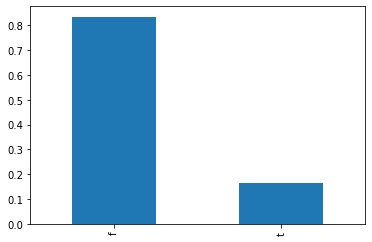

In [220]:
# Explore Booking type in Boston airbnb:
BoT=listings_data.instant_bookable.value_counts()
(BoT/listings_data.shape[0]).plot(kind='bar')


In [221]:
# Drop Unused columns:

listing = ['id', 'host_id','scrape_id', 'last_scraped', 'name', 'summary', 'description', 
           'neighborhood_overview', 'transit', 'access', 'interaction', 'instant_bookable',
           'neighborhood_overview', 'thumbnail_url', 'listing_url', 'host_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_location', 
           'host_about', 'host_response_time', 'host_acceptance_rate', 'calendar_last_scraped',
           'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
           'street', 'neighbourhood_cleansed', 'state', 'market', 'smart_location',
           'country_code', 'country', 'first_review', 'last_review', 'experiences_offered', 'host_has_profile_pic', 'space',
           'host_verifications', 'host_identity_verified', 'require_guest_profile_picture', 'requires_license', 'house_rules', 'notes']

listings_data.drop(listing, axis = 1, inplace = True)

In [222]:
listings_data.head()

,host_name,host_since,host_response_rate,host_is_superhost,neighbourhood,neighbourhood_group_cleansed,city,zipcode,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Virginia,2015-04-15,NaN,f,Roslindale,NaN,Boston,02131,42.282619,-71.133068,...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,f,1,NaN
1,Andrea,2012-06-07,100%,f,Roslindale,NaN,Boston,02131,42.286241,-71.134374,...,10.0,10.0,9.0,9.0,NaN,NaN,moderate,f,1,1.30
2,Phil,2009-05-11,100%,t,Roslindale,NaN,Boston,02131,42.292438,-71.135765,...,10.0,10.0,9.0,10.0,NaN,NaN,moderate,f,1,0.47
3,Meghna,2013-04-21,100%,f,NaN,NaN,Boston,NaN,42.281106,-71.121021,...,10.0,10.0,10.0,10.0,NaN,NaN,moderate,f,1,1.00
4,Linda,2014-05-11,100%,t,Roslindale,NaN,Boston,02131,42.284512,-71.136258,...,10.0,10.0,9.0,10.0,NaN,NaN,flexible,f,1,2.25


In [223]:
set(listings_data.columns[listings_data.isnull().mean() >0.50])

{'has_availability',
 'jurisdiction_names',
 'license',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'security_deposit',
 'square_feet',
 'weekly_price'}

In [224]:
datafordrop = ['has_availability',
 'jurisdiction_names',
 'license',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'security_deposit',
 'square_feet',
 'weekly_price']
listings_data.drop(datafordrop,axis=1,inplace=True)

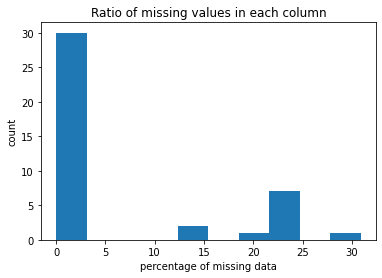

In [225]:
# Drop part of columns with ratio of missing columns:

def Drop(data):
    null_val = data.isnull().sum()
    total_val = null_val / (data.shape[0]) * 100
    plt.hist(total_val)
    plt.title('Ratio of missing values in each column')
    plt.xlabel('percentage of missing data')
    plt.ylabel('count')
    
    final_val = total_val[total_val > 50].index
    data.drop(final_val, axis = 1, inplace = True)
    
Drop(listings_data)

In [226]:
listings_data.head()

,host_name,host_since,host_response_rate,host_is_superhost,neighbourhood,city,zipcode,latitude,longitude,is_location_exact,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Virginia,2015-04-15,NaN,f,Roslindale,Boston,02131,42.282619,-71.133068,t,...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,f,1,NaN
1,Andrea,2012-06-07,100%,f,Roslindale,Boston,02131,42.286241,-71.134374,t,...,10.0,9.0,10.0,10.0,9.0,9.0,moderate,f,1,1.30
2,Phil,2009-05-11,100%,t,Roslindale,Boston,02131,42.292438,-71.135765,t,...,10.0,9.0,10.0,10.0,9.0,10.0,moderate,f,1,0.47
3,Meghna,2013-04-21,100%,f,NaN,Boston,NaN,42.281106,-71.121021,f,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,f,1,1.00
4,Linda,2014-05-11,100%,t,Roslindale,Boston,02131,42.284512,-71.136258,t,...,10.0,10.0,10.0,10.0,9.0,10.0,flexible,f,1,2.25


In [227]:
listings_data.price.value_counts()

$150.00    144
$200.00    117
$100.00    101
$250.00     95
$75.00      94
          ... 
$276.00      1
$695.00      1
$342.00      1
$106.00      1
$459.00      1
Name: price, Length: 324, dtype: int64

In [228]:
# convert price to float

def Converter(column):
    try:
        if '$' in column:
            column = column.replace('$','')
            return float(str(column))
    except:
            return column

In [229]:
listings_data['cleaning_fee'] = listings_data['cleaning_fee'].apply(lambda ele: Converter(ele))
listings_data['extra_people'] = listings_data['extra_people'].apply(lambda ele: Converter(ele))
listings_data['price'] = listings_data['price'].apply(lambda ele: Converter(ele))

In [230]:
listings_data.price.value_counts()

150.0    144
200.0    117
100.0    101
250.0     95
75.0      94
        ... 
276.0      1
695.0      1
342.0      1
106.0      1
459.0      1
Name: price, Length: 324, dtype: int64

In [231]:
# Detail describtion:

listings_data[['minimum_nights', 'cleaning_fee', 'price', 'availability_365', 'number_of_reviews', 'reviews_per_month']].describe()

,minimum_nights,cleaning_fee,availability_365,number_of_reviews,reviews_per_month
count,3585.000000,2478.000000,3585.000000,3585.000000,2829.000000
mean,3.171269,68.380145,179.346444,19.044630,1.970908
std,8.874133,51.297835,142.136180,35.571658,2.120561
min,1.000000,5.000000,0.000000,0.000000,0.010000
25%,1.000000,25.000000,19.000000,1.000000,0.480000
50%,2.000000,50.000000,179.000000,5.000000,1.170000
75%,3.000000,100.000000,325.000000,21.000000,2.720000
max,300.000000,300.000000,365.000000,404.000000,19.150000


In [232]:
# replace t with YES and f with NO:

def Replacer(col):
    try:
        if 't' in col: 
            col = col.replace('t', 'Yes')
            return col
        elif 'f' in col:
            col = col.replace('f', 'No')
            return col
    except:
        return col
    
listings_data['host_is_superhost'] = listings_data['host_is_superhost'].apply(lambda ele: Replacer(ele))
listings_data['require_guest_phone_verification'] = listings_data['require_guest_phone_verification'].apply(lambda ele: Replacer(ele))
listings_data['is_location_exact'] = listings_data['is_location_exact'].apply(lambda ele: Replacer(ele))


In [233]:
listings_data['host_response_rate']

0        NaN
1       100%
2       100%
3       100%
4       100%
        ... 
3580     96%
3581     10%
3582     78%
3583    100%
3584    100%
Name: host_response_rate, Length: 3585, dtype: object

In [234]:
#  Remore % and convert to float:
def Clean(col):
    try:
        return float(str( col[:-1]))/100
    except:
        return col
    
    
listings_data['host_response_rate'] = listings_data['host_response_rate'].apply(lambda ele: Clean(ele))

In [235]:
# Change format:

now = datetime.now()
listings_data.host_since = listings_data.host_since.apply(lambda ele: (now - datetime.strptime(ele, "%Y-%m-%d")).days)

In [236]:
listings_data[['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000
mean,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234
std,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116
min,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
25%,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# mean value for all review scores were around 90/100 and 9/10

In [237]:
lists = ['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'host_response_rate', 'cleaning_fee']
for ele in lists:
    listings_data[ele].fillna(listings_data[ele].mean(),axis=0,inplace=True)
    

In [238]:
listings_data[['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234
std,8.381157,0.817902,1.026947,0.669837,0.646143,0.793095,0.887785
min,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
25%,91.000000,9.000000,9.000000,9.646293,9.646549,9.000000,9.000000
50%,92.000000,9.431571,9.258041,10.000000,10.000000,9.414043,9.168234
75%,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [239]:
# Fill Unknown for object type:

listings_data.neighbourhood = listings_data.neighbourhood.fillna('Unknown')
listings_data.city = listings_data.city.fillna('Unknown')
listings_data.property_type = listings_data.property_type.fillna('Unknown')

In [240]:
# Fill 0 for price

listings_data.price = listings_data.price.fillna(0)

In [241]:
listings_data[['bedrooms', 'bathrooms', 'beds']].describe()

,bedrooms,bathrooms,beds
count,3575.000000,3571.000000,3576.000000
mean,1.255944,1.221647,1.609060
std,0.753060,0.501487,1.011745
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000
max,5.000000,6.000000,16.000000


In [242]:
# Fill mode for bedroom and bathroom:

lists = ['bedrooms', 'bathrooms', 'beds']
for ele in lists:
    listings_data[ele].fillna(listings_data[ele].median(),axis=0,inplace=True)

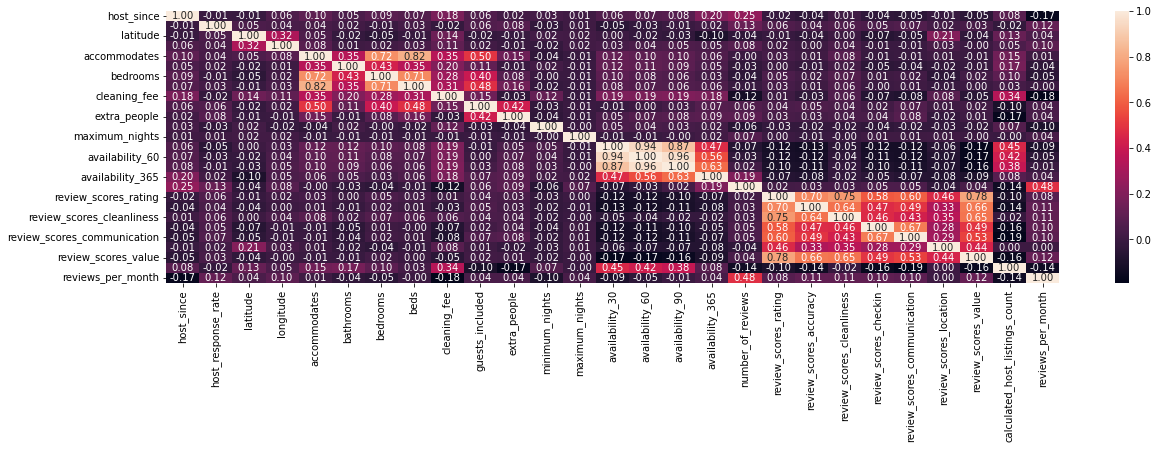

In [243]:
# Plot correlation for columns:

plt.figure(figsize = [20,5])

sb.heatmap(listings_data.corr(), annot=True, fmt=".2f");

In [244]:
listings_data.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                  32
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                       15
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Gym,"Elevator in Building","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}    14
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heati

In [245]:
# Change datatype:
amenities = listings_data.amenities.map(lambda ele: [amenity_list.replace('"', '').replace('{', '').replace('}', '').replace('/', '') for amenity_list in ele.split(',')])

mlb = MultiLabelBinarizer()
fit = pd.DataFrame(mlb.fit_transform(amenities), columns=mlb.classes_, index=amenities.index)

In [246]:
# Drop amenities:

listings_data.drop(['amenities'], axis = 1, inplace = True)

In [247]:
# Combine ameamenities to listing data:

listings_data = pd.concat([listings_data, fit], axis = 1, sort = False)

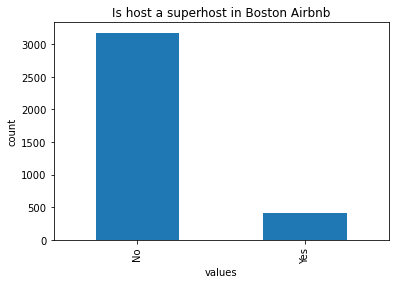

In [248]:
# Explore superhost:

listings_data.host_is_superhost.value_counts().plot(kind = 'bar')
plt.title('Is host a superhost in Boston Airbnb')
plt.xlabel('values')
plt.ylabel('count');

In [ ]:
# Drop na values:
listings_data = listings_data.dropna(axis=0,how='any',thresh=None,subset=None, inplace=False)

# Calendar data :

In [251]:
# Read in the datasets:

calendar_data.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [254]:
calendar_data.sample(10)

,listing_id,date,available,price
224180,9261381,2017-06-27,f,NaN
250902,14624254,2017-02-13,f,NaN
13260,10116095,2017-03-20,t,$115.00
624350,12432535,2016-12-04,t,$200.00
417207,10671192,2017-08-24,f,NaN
116266,5166870,2017-02-17,t,$170.00
138274,1885386,2016-11-05,t,$80.00
777846,6936712,2017-06-09,t,$175.00
318382,8420883,2017-05-26,t,$75.00
551109,3704801,2016-10-16,f,NaN


In [255]:
calendar_data.shape

(1308890, 4)

In [256]:
calendar_data.nunique()

listing_id    3585
date           365
available        2
price         1246
dtype: int64

In [257]:
calendar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [258]:
calendar_data.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [259]:
calendar_data.describe(include='object')

,date,available,price
count,1308890,1308890,643037
unique,365,2,1246
top,2017-09-05,f,$150.00
freq,3586,665853,20752


In [270]:
# Columns with 0 missing values:
set(calendar_data.columns[calendar_data.isnull().mean() == 0])

{'available', 'date', 'listing_id'}

In [277]:
# Columns with 50% missing values:
set(calendar_data.columns[calendar_data.isnull().mean() > 0.5])

{'price'}

In [279]:
calendar_data.price.value_counts()

$150.00      20752
$65.00       17518
$75.00       16249
$100.00      15499
$200.00      14326
             ...  
$1,875.00        1
$1,621.00        1
$1,695.00        1
$1,924.00        1
$1,017.00        1
Name: price, Length: 1246, dtype: int64

In [280]:
sum(calendar_data.duplicated())

365

<AxesSubplot:>

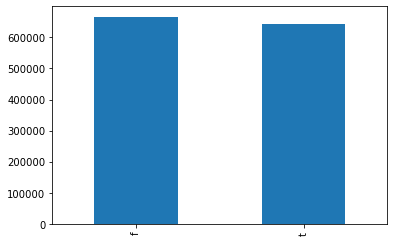

In [281]:
# explore availability:
calendar_data.available.value_counts().plot(kind='bar')

In [292]:
# Drop duplicates:

calendar_data.drop_duplicates()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [294]:
# Convert price to float:

calendar_data['price'] = calendar_data['price'].apply(lambda ele: Converter(ele))

In [295]:
# replace t = Yes and f = NO:

calendar_data['available'] = calendar_data['available'].replace('t', 'Available')
calendar_data['available'] = calendar_data['available'].replace('f', 'Not_Available')

,listing_id,date,available,price
0,12147973,2017-09-05,Not_Available,NaN
1,12147973,2017-09-04,Not_Available,NaN
2,12147973,2017-09-03,Not_Available,NaN
3,12147973,2017-09-02,Not_Available,NaN
4,12147973,2017-09-01,Not_Available,NaN


In [298]:
# Change data format:

calendar_data['date'] = pd.to_datetime(calendar_data.date)
    
month = calendar_data['date'].dt.month
month = month.replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Septempber', 10:'October', 11:'November', 12:'December'})

day = calendar_data['date'].dt.weekday
day = day.replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
 
year = calendar_data['date'].dt.year
    
calendar_data['Month'] = month
calendar_data['Day'] = day
calendar_data['Year'] = year

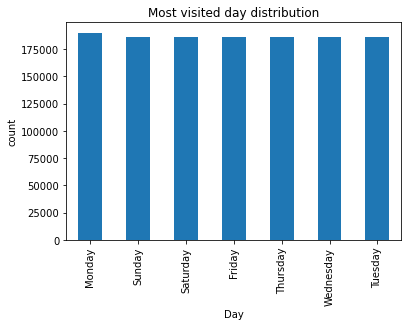

In [300]:
calendar_data.Day.value_counts().plot(kind = 'bar')
plt.title('Most visited day distribution')
plt.xlabel('Day')
plt.ylabel('count');

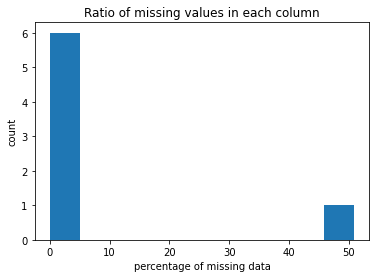

In [301]:
# Drop part of columns with ratio of missing columns:

Drop(calendar_data)

In [303]:
reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [305]:
reviews_data.shape

(68275, 6)

In [306]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [307]:
reviews_data.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


In [308]:
reviews_data.describe(include='object')

,date,reviewer_name,comments
count,68275,68275,68222
unique,2045,14775,67311
top,2016-04-19,David,The host canceled this reservation the day bef...
freq,342,654,112


In [310]:
sum(reviews_data.duplicated())

0

In [312]:
reviews_data['date'] = pd.to_datetime(reviews_data.date)
    
month = reviews_data['date'].dt.month
month = month.replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Septempber', 10:'October', 11:'November', 12:'December'})

day = reviews_data['date'].dt.weekday
day = day.replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
 
year = reviews_data['date'].dt.year
    
reviews_data['Month'] = month
reviews_data['Day'] = day
reviews_data['Year'] = year

In [314]:
# Fill comment column:

reviews_data.comments = reviews_data.comments.fillna('Unknown')

# Q1: What is the busiest time in the year?

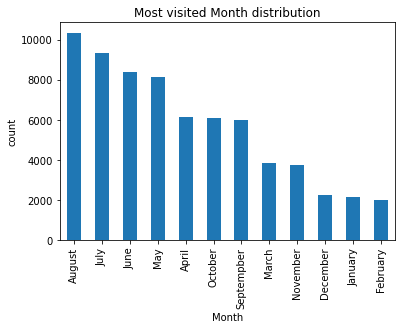

In [316]:
# Plot most visited month: 

reviews_data.Month.value_counts().plot(kind = 'bar')
plt.title('Most visited Month distribution')
plt.xlabel('Month')
plt.ylabel('count');

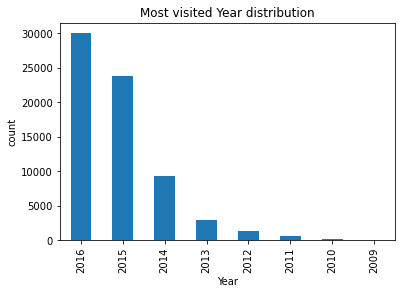

In [318]:
# Plot most visited Year: 

reviews_data.Year.value_counts().plot(kind = 'bar')
plt.title('Most visited Year distribution')
plt.xlabel('Year')
plt.ylabel('count');

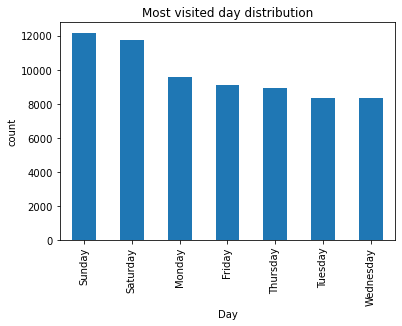

In [320]:
# Plot most visited day: 

reviews_data.Day.value_counts().plot(kind = 'bar')
plt.title('Most visited day distribution')
plt.xlabel('Day')
plt.ylabel('count');

# Q2: Most expensive neighbourhood in Boston?

In [321]:
listings_data['price'] = listings_data['price'].apply(lambda ele: Converter(ele))

In [323]:
neighbour = listings_data.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = False)[:10]
neighbour

neighbourhood
Harvard Square        359.000000
Financial District    283.692308
Downtown Crossing     273.500000
Leather District      245.875000
Back Bay              241.993103
Chinatown             235.410256
Theater District      234.151515
West End              221.602941
Beacon Hill           212.080460
South Boston          210.741784
Name: price, dtype: float64

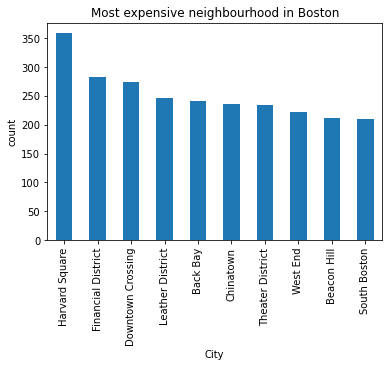

In [324]:
# Most expensive neighbourhood in Boston:

neighbour.plot(kind = 'bar')
plt.title('Most expensive neighbourhood in Boston')
plt.xlabel('City')
plt.ylabel('count');

According to graph, Harvard Square is the most expensive neighbourhood city with $359 in Boston Airbnb followed by Financial District

In [328]:
amenitie = fit
amenitie.sum().sort_values(ascending = False)[:10]

Wireless Internet    3421
Heating              3384
Kitchen              3284
Essentials           2994
Smoke Detector       2911
Air Conditioning     2821
TV                   2607
Internet             2577
Dryer                2476
Washer               2475
dtype: int64

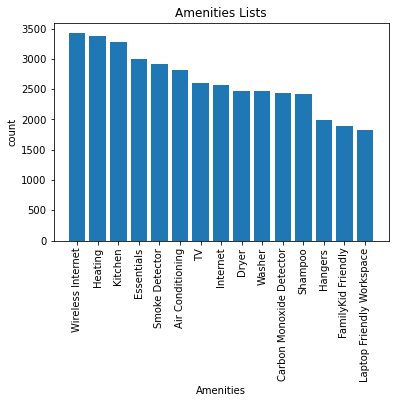

In [329]:
# Plot Amenities Lists:

amen = fit.sum().sort_values(ascending = False)[:15]
#plt.figure(figsize = [20,5])
plt.bar(amen.index, amen.values)
plt.title('Amenities Lists')
plt.xlabel('Amenities')
plt.ylabel('count')
plt.xticks(rotation = 90);

According to graph, top amenities that visitors liked was wireless interent, followed by heating, kitchen

# Which month do visitors like to visit Boston Airbnb(Based on review counts)?

In [331]:
new = reviews_data.groupby(['Month']).count()[['reviewer_id']].sort_values(by = 'reviewer_id', ascending = False)
new

,reviewer_id
Month,
August,10345
July,9333
June,8369
May,8115
April,6116
October,6095
Septempber,5985
March,3853
November,3729


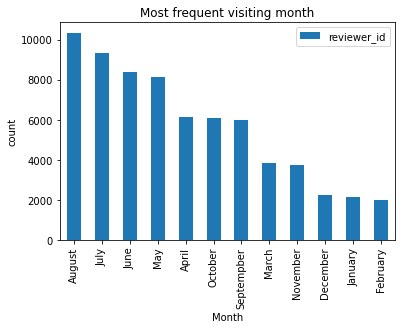

In [332]:
# Most frequent visiting month:

new.plot(kind='bar')
plt.title('Most frequent visiting month')
plt.xlabel('Month')
plt.ylabel('count');

According to graph, in the month of August most of the visitors like to visit the Boston Airbnb followed by July, June, May.

In the month of January and February and December, number of visitor were less

# Data Modeling:

In [333]:
# Create new list from listing_data(only int and float)

num = ['price', 'latitude','longitude', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 
             'cleaning_fee', 'guests_included','host_response_rate', 'availability_30', 'availability_60', 'availability_90', 
             'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
             'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'extra_people']

In [335]:
# Add list to new variable:

data = listings_data.select_dtypes(include=['int64', 'float64'])[num]

In [341]:
# Create new list from listing_data(only Object)

cat = ['neighbourhood', 'require_guest_phone_verification', 'bed_type', 'room_type', 'host_is_superhost', 'cancellation_policy', 'property_type', 'is_location_exact']

In [343]:
# combine both num and cat into data dataset:

data[cat] = listings_data[cat]


In [344]:
# Copy original data:

d_data = data.copy()

In [345]:
# OneHotEncoder:

new_data = pd.get_dummies(d_data)

In [346]:
# Drop na values:

new_data = new_data.dropna(axis=0, how='any', thresh=None, 
                           subset=None, inplace=False)

In [347]:
# Split data:


X = new_data.drop('price',  axis =1 )
y = new_data['price']

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

# Linear Regression:


In [349]:
# Linear Regression Model:

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.5040011464019477

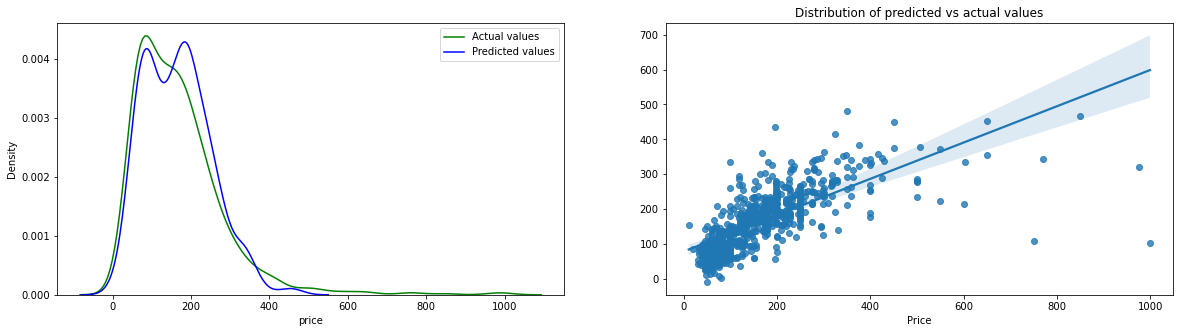

In [350]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_pred, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_pred)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

# Random Forest:

In [351]:
# random Forest Model:

ran = RandomForestRegressor(n_estimators=80, random_state=42)
ran.fit(X_train, y_train)

y_preds = ran.predict(X_test)
r2_score(y_test, y_preds)

0.5623700591349239

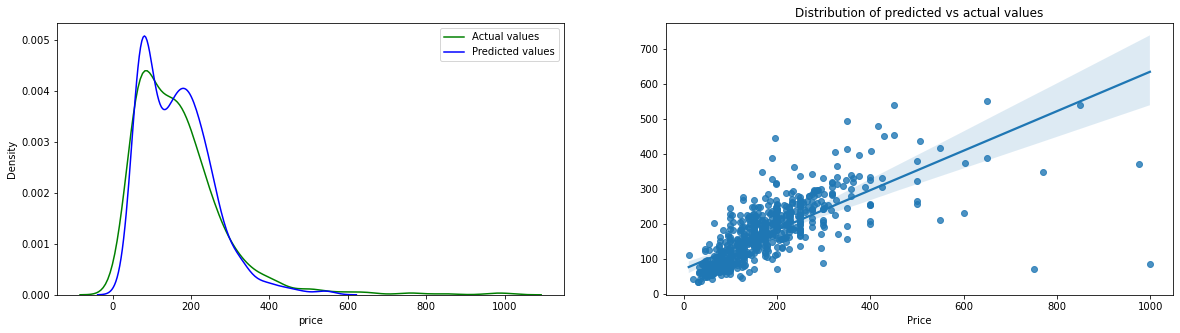

In [352]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_preds, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_preds)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

# Ridge Regression:


In [353]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_p = model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_p))
RMSE

81.93547799533671

In [354]:
rid_model = RidgeCV(alphas=np.arange(0, 1, 0.10), cv=10, scoring='neg_mean_absolute_error')

rid_model.fit(X_train, y_train)

print('alpha: %f' % rid_model.alpha_)

alpha: 0.100000


In [355]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_predict = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_predict))

81.86702309465304

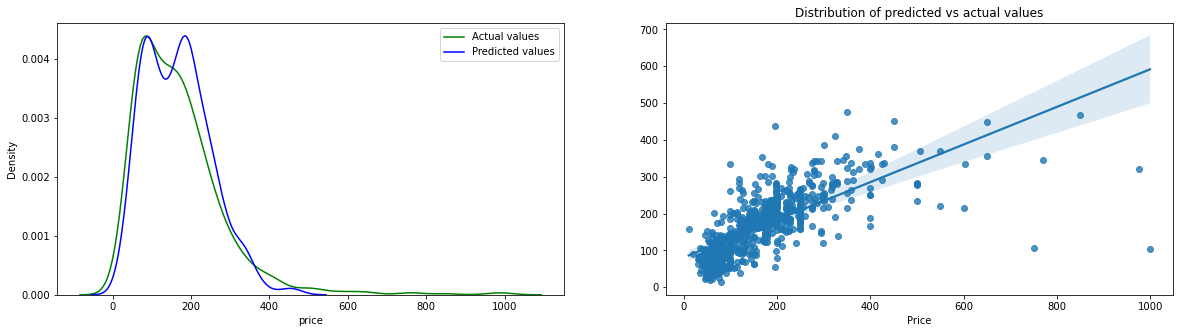

In [356]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_p, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_p)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

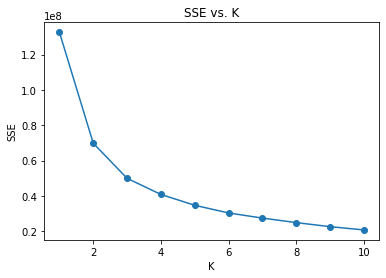

In [357]:
from sklearn.cluster import KMeans

wcss = []
for ele in range(1,11):
    k = KMeans(n_clusters = ele, init='k-means++', random_state=42)
    k.fit(new_data)
    wcss.append(k.inertia_)
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE vs. K');

In [358]:
k = KMeans(n_clusters = 10, init='k-means++', random_state=42)
new = k.fit_predict(new_data)
new

array([4, 0, 0, ..., 4, 5, 1])

# Data Evalution:
For this part i will use KMeans clustering to listings into different clusters to understand the popularity of a listing

In [359]:
# add new column cluster to data:

new_data['cluster'] = pd.Series(new, index=new_data.index)
new_data.head()

,price,latitude,longitude,accommodates,bedrooms,bathrooms,beds,cleaning_fee,guests_included,host_response_rate,...,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Unknown,property_type_Villa,is_location_exact_No,is_location_exact_Yes,cluster
0,250.0,42.282619,-71.133068,4,2.0,1.5,3.0,35.000000,1,0.949891,...,0,1,0,0,0,0,0,0,1,4
1,65.0,42.286241,-71.134374,2,1.0,1.0,1.0,10.000000,0,1.000000,...,0,0,0,0,0,0,0,0,1,0
2,65.0,42.292438,-71.135765,2,1.0,1.0,1.0,68.380145,1,1.000000,...,0,0,0,0,0,0,0,0,1,0
4,79.0,42.284512,-71.136258,2,1.0,1.5,2.0,15.000000,1,1.000000,...,0,1,0,0,0,0,0,0,1,0
5,75.0,42.291690,-71.131893,2,1.0,1.0,1.0,30.000000,1,1.000000,...,0,0,0,0,0,0,0,0,1,1


In [360]:
# Groupby cluster data to find mean values:

c_group = new_data.groupby('cluster').mean()
c_group

,price,latitude,longitude,accommodates,bedrooms,bathrooms,beds,cleaning_fee,guests_included,host_response_rate,...,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Unknown,property_type_Villa,is_location_exact_No,is_location_exact_Yes
cluster,,,,,,,,,,,,,,,,,,,,,
0,87.198058,42.327392,-71.089717,2.135922,1.003883,1.233010,1.252427,49.921409,1.133981,0.940715,...,0.003883,0.000000,0.333981,0.005825,0.015534,0.011650,0.000000,0.001942,0.231068,0.768932
1,113.907859,42.336830,-71.086211,2.490515,1.021680,1.132791,1.365854,55.372297,1.360434,0.961676,...,0.002710,0.000000,0.192412,0.005420,0.000000,0.040650,0.000000,0.000000,0.143631,0.856369
2,247.341085,42.347370,-71.082695,4.023256,1.538760,1.439922,1.856589,96.241718,1.279070,0.958680,...,0.000000,0.003876,0.031008,0.007752,0.000000,0.000000,0.003876,0.000000,0.015504,0.984496
3,561.224138,42.342004,-71.079540,6.189655,2.620690,2.000000,3.534483,134.664858,3.034483,0.942402,...,0.000000,0.000000,0.344828,0.017241,0.034483,0.034483,0.000000,0.000000,0.103448,0.896552
4,230.829060,42.347476,-71.076386,3.688034,1.472222,1.229701,1.869658,70.444703,1.638889,0.935035,...,0.000000,0.000000,0.066239,0.017094,0.006410,0.014957,0.002137,0.004274,0.106838,0.893162
5,91.841823,42.331633,-71.090214,2.222520,1.018767,1.135389,1.284182,47.274205,1.209115,0.954982,...,0.000000,0.000000,0.284182,0.005362,0.000000,0.013405,0.000000,0.000000,0.176944,0.823056
6,94.335277,42.339117,-71.095202,2.276968,1.014577,1.104956,1.268222,48.409829,1.166181,0.946669,...,0.001458,0.000000,0.134111,0.016035,0.000000,0.017493,0.001458,0.002915,0.106414,0.893586
7,187.642384,42.346286,-71.076911,3.474614,1.178808,1.120309,1.706402,97.569039,1.684327,0.965051,...,0.000000,0.000000,0.061810,0.015453,0.004415,0.011038,0.000000,0.000000,0.139073,0.860927
8,501.958333,42.349947,-71.073619,5.013889,2.236111,1.729167,2.736111,96.216707,1.694444,0.946212,...,0.000000,0.000000,0.083333,0.013889,0.027778,0.013889,0.000000,0.013889,0.083333,0.916667


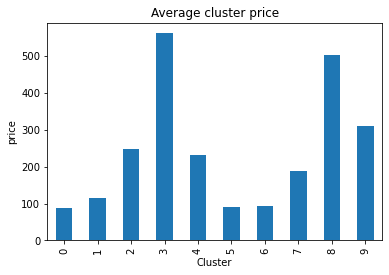

In [361]:
# Plot cluster wrt price:

c_group.price.plot(kind = 'bar')
plt.xlabel('Cluster')
plt.ylabel('price')
plt.title('Average cluster price');

In [362]:
t = c_group.T
t

cluster,0,1,2,3,4,5,6,7,8,9
price,87.198058,113.907859,247.341085,561.224138,230.829060,91.841823,94.335277,187.642384,501.958333,310.017668
latitude,42.327392,42.336830,42.347370,42.342004,42.347476,42.331633,42.339117,42.346286,42.349947,42.347986
longitude,-71.089717,-71.086211,-71.082695,-71.079540,-71.076386,-71.090214,-71.095202,-71.076911,-71.073619,-71.075456
accommodates,2.135922,2.490515,4.023256,6.189655,3.688034,2.222520,2.276968,3.474614,5.013889,4.586572
bedrooms,1.003883,1.021680,1.538760,2.620690,1.472222,1.018767,1.014577,1.178808,2.236111,1.893993
...,...,...,...,...,...,...,...,...,...,...
property_type_Townhouse,0.011650,0.040650,0.000000,0.034483,0.014957,0.013405,0.017493,0.011038,0.013889,0.000000
property_type_Unknown,0.000000,0.000000,0.003876,0.000000,0.002137,0.000000,0.001458,0.000000,0.000000,0.000000
property_type_Villa,0.001942,0.000000,0.000000,0.000000,0.004274,0.000000,0.002915,0.000000,0.013889,0.000000
is_location_exact_No,0.231068,0.143631,0.015504,0.103448,0.106838,0.176944,0.106414,0.139073,0.083333,0.102473


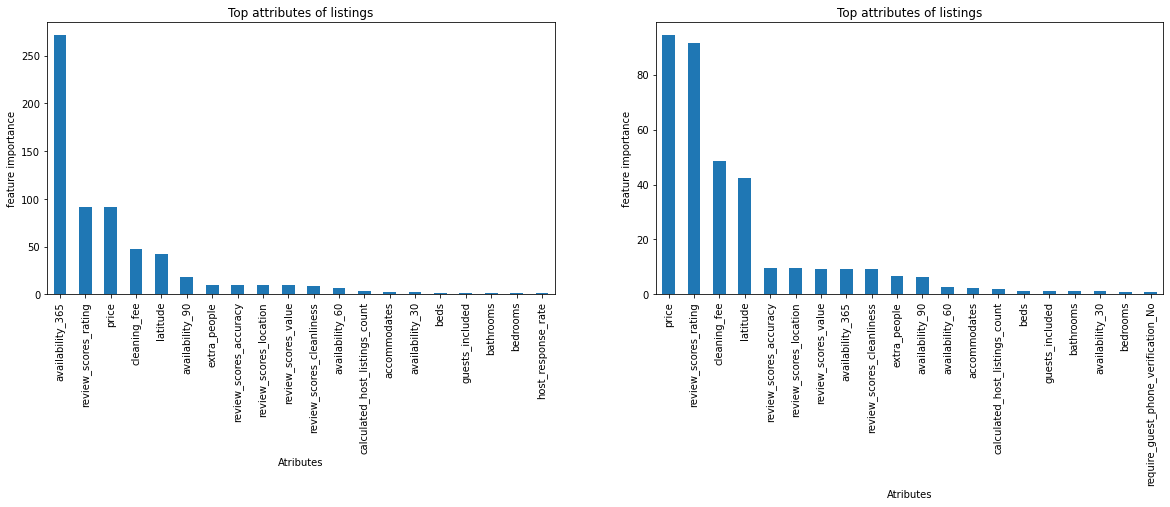

In [363]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
t[5].sort_values(ascending=False).head(20).plot(kind = 'bar')
plt.xlabel('Atributes')
plt.ylabel('feature importance')
plt.title('Top attributes of listings');

plt.subplot(1,2,2)
t[6].sort_values(ascending=False).head(20).plot(kind = 'bar')
plt.xlabel('Atributes')
plt.ylabel('feature importance')
plt.title('Top attributes of listings');

In [364]:
# Mean values:

m_val = c_group.mean()
m_val

price                      242.629569
latitude                    42.341604
longitude                  -71.082595
accommodates                 3.610195
bedrooms                     1.499949
                              ...    
property_type_Townhouse      0.015756
property_type_Unknown        0.000747
property_type_Villa          0.002302
is_location_exact_No         0.120873
is_location_exact_Yes        0.879127
Length: 84, dtype: float64

In [365]:
# calculate difference in mean to check different clusters:

dd = (c_group - m_val) *100 / m_val
dd

,price,latitude,longitude,accommodates,bedrooms,bathrooms,beds,cleaning_fee,guests_included,host_response_rate,...,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Unknown,property_type_Villa,is_location_exact_No,is_location_exact_Yes
cluster,,,,,,,,,,,,,,,,,,,,,
0,-64.061240,-0.033566,0.010019,-40.836365,-33.072164,-8.556909,-34.730035,-37.401360,-30.035705,-0.940939,...,382.346967,-100.0,107.487459,-45.864342,75.287953,-26.059118,-100.000000,-15.648048,91.166451,-12.534624
1,-53.052771,-0.011275,0.005087,-31.014385,-31.885675,-15.989355,-28.818840,-30.566252,-16.064015,1.266304,...,236.597138,-100.0,19.537073,-49.629876,-100.000000,157.991561,-100.000000,-100.000000,18.828728,-2.588793
2,1.941856,0.013618,0.000140,11.441524,2.587459,6.788261,-3.244269,20.681704,-21.083998,0.950831,...,-100.000000,900.0,-80.736246,-27.959009,-100.000000,-100.000000,418.840299,-100.000000,-87.173380,11.985610
3,131.309045,0.000944,-0.004298,71.449352,74.718569,48.325014,84.198784,68.862161,87.221412,-0.763270,...,-100.000000,-100.0,114.226226,60.229101,289.109033,118.848014,-100.000000,-100.000000,-14.415483,1.982008
4,-4.863591,0.013867,-0.008734,2.156107,-1.848523,-8.802302,-2.563182,-11.666302,1.116110,-1.539063,...,-100.000000,-100.0,-58.848424,58.859622,-27.665628,-5.072336,186.027344,85.646390,-11.611432,1.596475
5,-62.147308,-0.023549,0.010719,-38.437664,-32.079913,-15.796725,-33.075124,-40.720805,-25.400047,0.561396,...,-100.000000,-100.0,76.549978,-50.170038,-100.000000,-14.925035,-100.000000,-100.000000,46.388530,-6.378035
6,-61.119629,-0.005875,0.017735,-36.929495,-32.359222,-18.053673,-33.906914,-39.296796,-28.049020,-0.313990,...,81.055895,-100.0,-16.682861,49.017736,-100.000000,11.019109,95.132357,26.650890,-11.961894,1.644660
7,-22.663019,0.011058,-0.007997,-3.755500,-21.410138,-16.915072,-11.071251,22.346090,3.919531,1.621617,...,-100.000000,-100.0,-61.600067,43.604890,-50.180300,-29.949311,-100.000000,-100.000000,15.057330,-2.070257
8,106.882589,0.019705,-0.012627,38.881404,49.079130,28.239335,42.591823,20.650342,4.543774,-0.362114,...,-100.000000,-100.0,-48.228662,29.073443,213.448943,-11.852883,-100.000000,503.350768,-31.056917,4.270066


In [366]:
d = dd.T
d

cluster,0,1,2,3,4,5,6,7,8,9
price,-64.061240,-53.052771,1.941856,131.309045,-4.863591,-62.147308,-61.119629,-22.663019,106.882589,27.774067
latitude,-0.033566,-0.011275,0.013618,0.000944,0.013867,-0.023549,-0.005875,0.011058,0.019705,0.015072
longitude,0.010019,0.005087,0.000140,-0.004298,-0.008734,0.010719,0.017735,-0.007997,-0.012627,-0.010043
accommodates,-40.836365,-31.014385,11.441524,71.449352,2.156107,-38.437664,-36.929495,-3.755500,38.881404,27.045022
bedrooms,-33.072164,-31.885675,2.587459,74.718569,-1.848523,-32.079913,-32.359222,-21.410138,49.079130,26.270478
...,...,...,...,...,...,...,...,...,...,...
property_type_Townhouse,-26.059118,157.991561,-100.000000,118.848014,-5.072336,-14.925035,11.019109,-29.949311,-11.852883,-100.000000
property_type_Unknown,-100.000000,-100.000000,418.840299,-100.000000,186.027344,-100.000000,95.132357,-100.000000,-100.000000,-100.000000
property_type_Villa,-15.648048,-100.000000,-100.000000,-100.000000,85.646390,-100.000000,26.650890,-100.000000,503.350768,-100.000000
is_location_exact_No,91.166451,18.828728,-87.173380,-14.415483,-11.611432,46.388530,-11.961894,15.057330,-31.056917,-15.221933


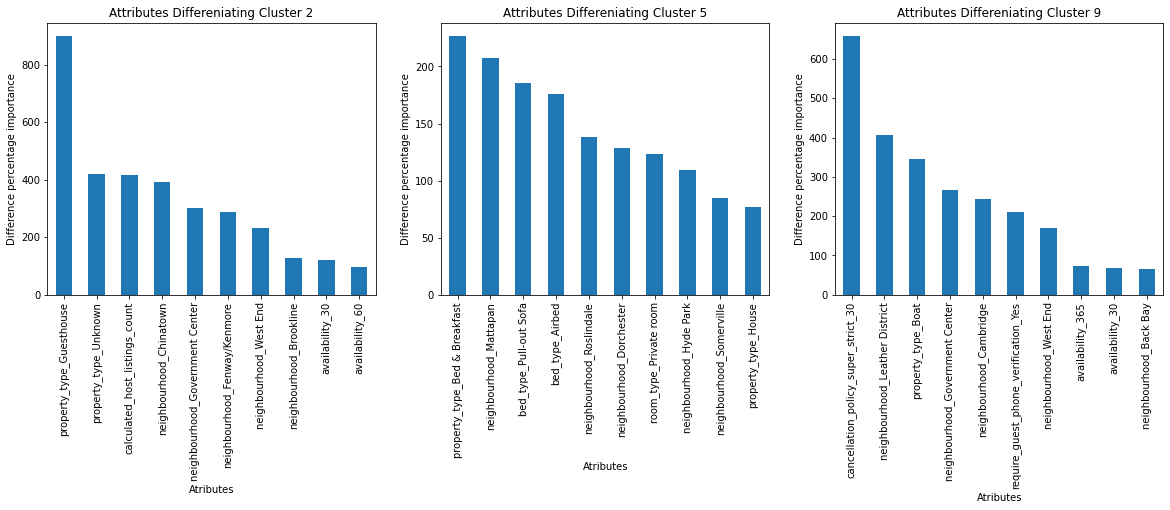

In [367]:
# Plot attributes associated with data:

plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
d[2].sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.xlabel('Atributes')
plt.ylabel('Difference percentage importance')
plt.title('Attributes Differeniating Cluster 2');

plt.subplot(1,3,2)
d[5].sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.xlabel('Atributes')
plt.ylabel('Difference percentage importance')
plt.title('Attributes Differeniating Cluster 5');

plt.subplot(1,3,3)
d[9].sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.xlabel('Atributes')
plt.ylabel('Difference percentage importance')
plt.title('Attributes Differeniating Cluster 9');

From the above graph, the top attributes associated with price are:

property
bed type
neighbourhood
strict cancelation policy
Summary:
In this project, we have analyzed Boston Airbnb data listings. Gathered Boston Airbnb listings, calendar_data and reviews_data from data@insideairbnb.com and analysed and cleaned. Used descriptive statistics and regression model(Multiple Linear Regression, Randon Forest Regression) and KMeans cluster to answer the following questions:

Most expensive month to visit Boston ?
The most expensive month was Septemper month with dollar 232.2 followed by October, November. March and February months was considerd as less expensive months. Price was spike during the month of September to November and again slightly high during the month of May. From June to August, avilability was stabilized.

Most expensive neighbourhood in Boston?
Harvard Square was the most expensive neighbourhood city with dollar 359 near Boston Airbnb followed by Financial District.

What are the top amenities people need?
Top amenities that visitors would liked was wireless interent, followed by heating, kitchen

Which month do people like to visit Boston (Based on review counts)?
August seems to be the most popular month followed by July, June, May.

Less crowded months would be January,February and December months.

I found that the main drive for Airbnb prices were during peak months and how many people a listing can accomode. And also amenities sush as internet, tv, ac, heating... In order to get very good reviews from the visitors, it is very important to respond to their enquires. So, amenities are important. Location also very important inorder to book Airbnb.

I also found that, Random Forest Regression is the best algorithm to predict the rental price of Boston Airbnb